In [1]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df.csv


In [34]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [12]:
# Load the data
df = pd.read_csv('df.csv')

# Display the first few rows of the dataset
df.head()

,index,A,B,C,D,E,F,G,H,I,type
0,0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.0,0.00,2
1,1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.0,0.00,1
2,2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.0,0.00,0
3,3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.0,0.05,0
4,4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.0,0.00,3


In [4]:
# Assuming 'df' is your DataFrame
n_rows = df.shape[0]
n_rows

214

In [5]:
# Assuming 'df' is your DataFrame
column_names = df.columns
column_names

Index(['index', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'type'], dtype='object')

In [6]:
# Assuming 'df' is your DataFrame
dimensions = df.shape
dimensions

(214, 11)

In [7]:
# Get basic statistics for numeric columns
df.describe()

,index,A,B,C,D,E,F,G,H,I,type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,106.500000,1.670467,16.089626,3.489813,2.745140,101.711215,0.745748,14.330888,0.297710,0.102757,1.542056
std,61.920648,0.003324,0.979979,1.875170,0.948929,1.084305,0.978743,2.276731,0.845669,0.175548,1.707648
min,0.000000,1.660000,12.880000,0.000000,0.550000,97.730000,0.000000,8.690000,0.000000,0.000000,0.000000
25%,53.250000,1.670000,15.490000,2.752500,2.260000,101.190000,0.185000,13.180000,0.000000,0.000000,0.000000
50%,106.500000,1.670000,15.960000,4.520000,2.580000,101.910000,0.830000,13.760000,0.000000,0.000000,1.000000
75%,159.750000,1.670000,16.592500,4.680000,3.100000,102.325000,0.920000,14.677500,0.000000,0.180000,2.000000
max,213.000000,1.690000,20.860000,5.840000,6.650000,105.570000,9.320000,25.900000,5.360000,0.920000,5.000000


# Visual representations

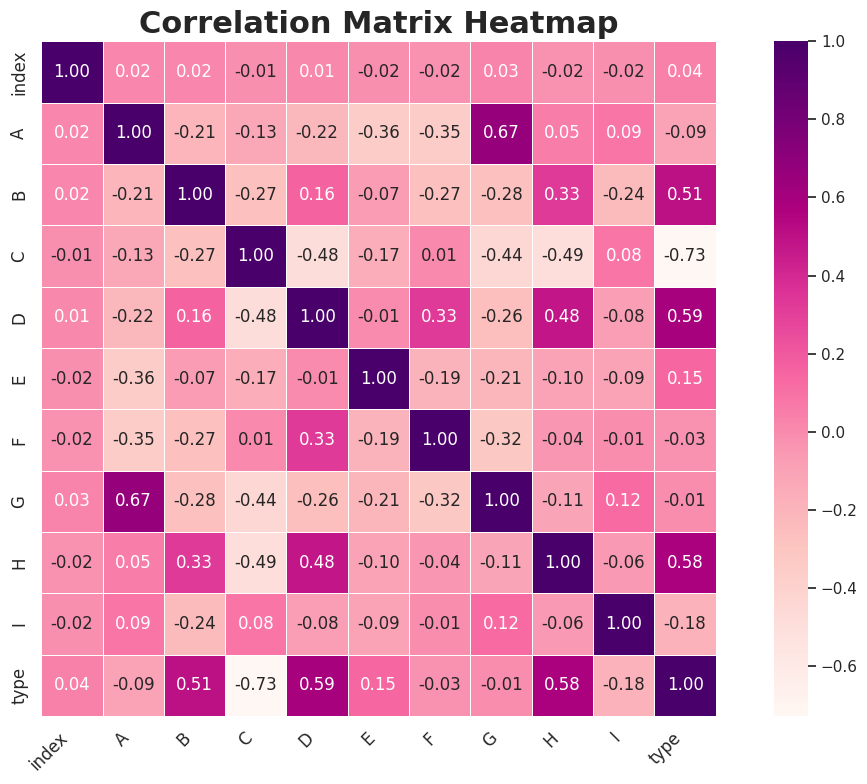

In [8]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df.corr()

sns.set(style="white")
plt.figure(figsize=(12, 8))

# Create a custom colormap that emphasizes pink tones
pink_cmap = sns.color_palette("RdPu", as_cmap=True)

# Create the heatmap with the pink colormap
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=pink_cmap, linewidths=0.5, linecolor='white', square=True)

# Add title and adjust the layout
plt.title('Correlation Matrix Heatmap', fontsize=22, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

# Show the heatmap
plt.show()

In [13]:
df = df.drop(columns=['index'])
df.head()

,A,B,C,D,E,F,G,H,I,type
0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.0,0.00,2
1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.0,0.00,1
2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.0,0.00,0
3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.0,0.05,0
4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.0,0.00,3


# Building a Multinomial logistic regression model:

In [15]:
target = 'type'

# Separate the features (X) and the target variable (y)
X = df.drop(columns=[target])
y = df[target]

# Display the first few rows of X and y to verify
print("Features (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Features (X):
      A      B     C     D       E     F      G    H     I
0  1.67  16.10  4.42  2.32  101.77  0.88  13.31  0.0  0.00
1  1.67  16.27  4.64  2.79  101.43  0.96  12.74  0.0  0.00
2  1.67  17.72  4.88  0.55  100.83  0.04  14.40  0.0  0.00
3  1.68  15.97  4.65  1.56  100.79  0.18  16.27  0.0  0.05
4  1.67  15.28  2.41  3.53  101.77  0.90  16.14  0.0  0.00

Target (y):
0    2
1    1
2    0
3    0
4    3
Name: type, dtype: int64


In [16]:
# Check the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

Shape of X (features): (214, 9)
Shape of y (target): (214,)


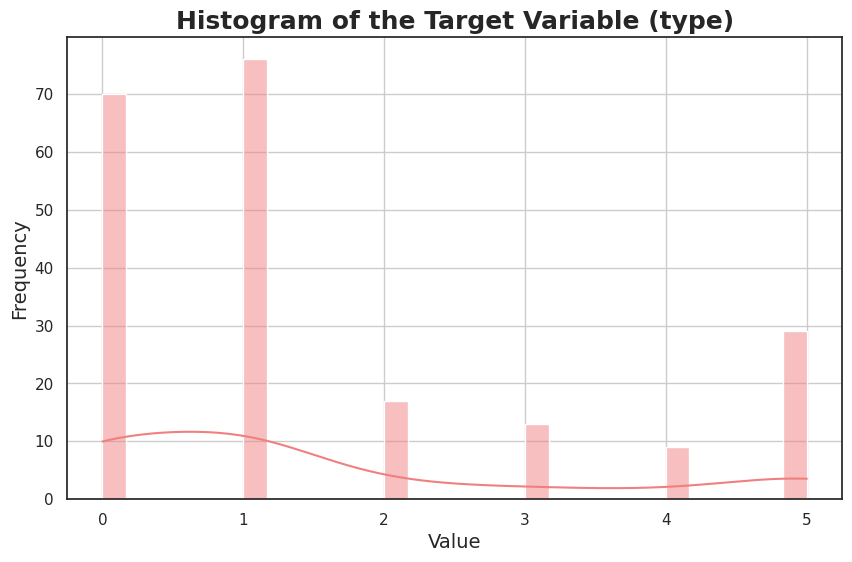

In [17]:
# Create a histogram of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df[target], kde=True, color='lightcoral', bins=30)
plt.title(f'Histogram of the Target Variable ({target})', fontsize=18, fontweight='bold')
plt.xlabel('Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2442)

# Print the lengths of the training and testing sets
print("Training set length:", len(X_train))
print("Testing set length:", len(X_test))
print("Training labels length:", len(y_train))
print("Testing labels length:", len(y_test))

Training set length: 149
Testing set length: 65
Training labels length: 149
Testing labels length: 65


In [32]:
# Display class distribution in the training data
train_class_distribution = y_train.value_counts()
print("Class distribution in the training data:")
print(train_class_distribution)

# Display class distribution in the test data
test_class_distribution = y_test.value_counts()
print("\nClass distribution in the test data:")
print(test_class_distribution)

Class distribution in the training data:
type
0    56
1    50
5    19
2    12
3     7
4     5
Name: count, dtype: int64

Class distribution in the test data:
type
1    26
0    14
5    10
3     6
2     5
4     4
Name: count, dtype: int64


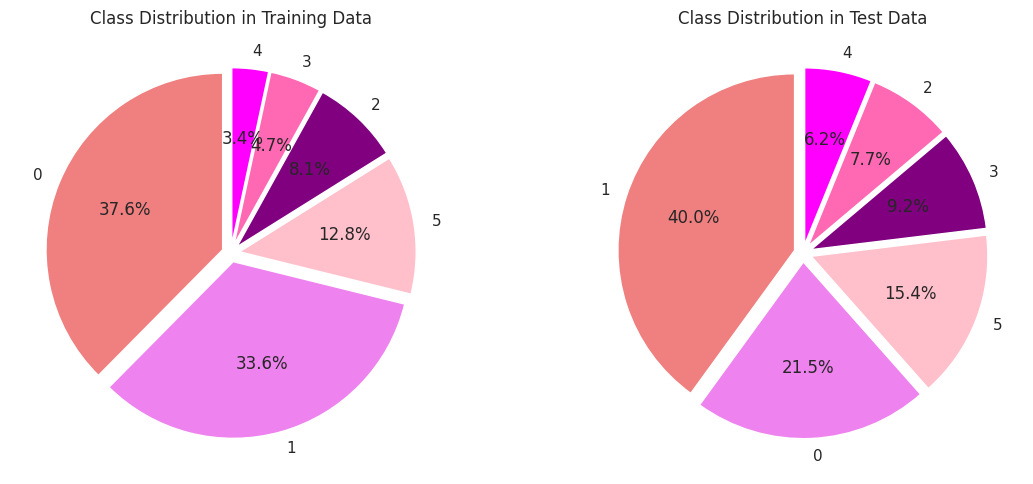

In [33]:
# Display class distribution in the training data using a pie chart
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # Create a subplot for the training data
y_train.value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'violet', 'pink', 'purple', 'hotpink', 'magenta'], startangle=90, explode=[0.05]*len(y_train.value_counts()))
plt.title('Class Distribution in Training Data')
plt.ylabel('')  # Remove y-axis label

# Display class distribution in the test data using a pie chart
plt.subplot(1, 2, 2)  # Create a subplot for the test data
y_test.value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'violet', 'pink', 'purple', 'hotpink', 'magenta'], startangle=90, explode=[0.05]*len(y_test.value_counts()))
plt.title('Class Distribution in Test Data')
plt.ylabel('')  # Remove y-axis label

plt.tight_layout()
plt.show()

In [45]:
# Scale the Data Manually
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)


In [38]:
# Initialize and Train the Logistic Regression Model
model = LogisticRegression(max_iter=1000, multi_class='multinomial')
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [46]:
# 1. Make Predictions on the Training Data
y_train_pred = model.predict(X_train_scaled)
print("Prediction of training data:")
print(y_train_pred);

# Calculate and print the accuracy score of the model
accuracy_train = accuracy_score(y_train, y_train_pred)

# Print Accuracy
print(f"Accuracy on Training Data: {accuracy_train:.4f}")

Prediction of training data:
[0 0 0 0 1 1 0 0 1 1 0 0 1 0 4 1 5 0 5 0 0 4 0 1 1 1 3 1 1 1 4 0 1 0 1 1 0
 5 4 1 1 5 1 1 5 3 0 5 0 0 1 1 0 4 1 0 0 0 1 1 0 0 5 0 5 1 0 0 1 0 0 3 0 0
 0 3 1 1 0 5 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 5 1 5 1 0 5 3 0 1 0 0 5
 1 1 1 0 1 5 0 1 0 5 0 0 0 0 0 0 1 0 0 1 5 1 5 1 0 5 0 0 0 0 0 3 0 3 1 0 1
 1]
Accuracy on Training Data: 0.7383


In [48]:
# Prediction on Testing data
y_test_pred = model.predict(X_test_scaled)
print("Prediction of test data:")
print(y_test_pred);

# Calculate and print the accuracy score of the model
accuracy_test = accuracy_score(y_test, y_test_pred)

# Print Accuracy
print(f"Accuracy on Test Data: {accuracy_test:.4f}")

Prediction of test data:
[1 5 1 0 1 5 4 0 0 1 0 0 0 1 0 1 1 5 1 0 0 4 5 1 1 0 4 5 0 1 1 0 1 1 0 0 1
 5 5 1 1 3 1 0 5 5 1 1 0 1 3 1 0 1 1 4 1 0 5 0 1 1 0 1 3]
Accuracy on Test Data: 0.6769


In [49]:
# 2. Evaluate the Predictions on the Training Data

# Classification Report for Training Data
print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred))

Classification Report (Training Data):
              precision    recall  f1-score   support

           0       0.66      0.84      0.74        56
           1       0.73      0.70      0.71        50
           2       0.00      0.00      0.00        12
           3       0.86      0.86      0.86         7
           4       0.80      0.80      0.80         5
           5       1.00      0.95      0.97        19

    accuracy                           0.74       149
   macro avg       0.67      0.69      0.68       149
weighted avg       0.69      0.74      0.71       149



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


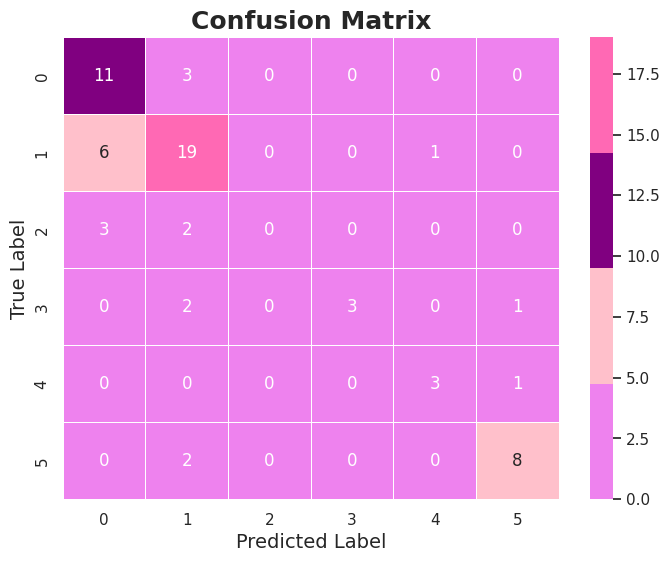

Confusion Matrix:
[[11  3  0  0  0  0]
 [ 6 19  0  0  1  0]
 [ 3  2  0  0  0  0]
 [ 0  2  0  3  0  1]
 [ 0  0  0  0  3  1]
 [ 0  2  0  0  0  8]]


In [52]:
# Confusion Matrix for Testing Data
cm = confusion_matrix(y_test, y_test_pred)

# Create a custom pink colormap
def create_pink_cmap():
    # Define a pink color map
    colors = ['violet', 'pink', 'purple', 'hotpink']
    cmap = sns.color_palette(colors, as_cmap=True)
    return cmap

pink_cmap = create_pink_cmap()

# Create a heatmap of the confusion matrix with the custom pink colormap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap=pink_cmap, linewidths=0.5, linecolor='white')
plt.title('Confusion Matrix', fontsize=18, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)